## The notebook below was written as part of the final project for the Data Science foundation class at Barcelona Technolgoy School by Rima Hinnawi
 

### The noteboook demonstrates an "end to end Machine Learning/sklearn workflow" for Diabetes Detection 

### The project will contain the following steps:

- Ingesting, exploring and cleaning data for your project
- Choosing/testing of algorithm approach
- Visualizing the results
- Packaging the project into a product (separate files in github repository for app code and deployment)

### Below is the process used: 

 - 1. Exploring and cleaning data for project
 - 2. Choosing the right algorithm
 - 3. Fitting the model/algorithm for our problem and using it to make predictions
 - 4. Evaluating the model
 - 5. Improving the model
 - 6. Saving and loading the trained model 
 - 7. Putting all together 




## MACHINE LEARNING FOR DIABETES


#### Dataset: Pima Indians Diabetes Database
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes based on certain diagnostic measurements. This dataset has the following consraint: All patients here are females at least 21 years old of Pima Indian heritage.

#### What is Diabetes:
Acccording to NIH, "Diabetes is a disease that occurs when the blood glucose(also called blood sugar) is too high. Blood glucose is our main source of energy and it comes from the food we eat. Insulin, a hormone made by the pancreas, helps glucose from food get into our cells so that it is used for energy. Sometimes our body doesn’t make enough or any insulin or it does not use insulin properly. Glucose then stays in our  blood and doesn’t reach your cells.Over time, having too much glucose in your blood can cause health problems such as Diabetes. 

There are different types of diabetes: 
- Type 1 diabetes If you have type 1 diabetes:  The body does not make insulin. The immune system attacks and destroys the cells in the pancreas that make insulin. Type 1 diabetes is usually diagnosed in children and young adults, although it can appear at any age. People with type 1 diabetes need to take insulin every day to stay alive.

- Type 2 diabetes If you have type 2 diabetes: The body does not make or use insulin properly. Someone can develop type 2 diabetes at any age, even during childhood. However, this type of diabetes occurs most often in middle-aged and older people. Type 2 is the most common type of diabetes.

- Gestational diabetes: Gestational diabetes develops in some women when they are pregnant. Most of the time, this type of diabetes goes away after the baby is born. However, if someone had gestational diabetes, they have a greater chance of developing type 2 diabetes later in life. Sometimes diabetes diagnosed during pregnancy is actually type 2 diabetes.

- Other types of diabetes Less common types include monogenic diabetes, which is an inherited form of diabetes, and cystic fibrosis-related diabetes ."

#### Dataset Attribute Information:

- Number of times pregnant

- Plasma glucose concentration a 2 hours in an oral glucose tolerance test

- Diastolic blood pressure (mm Hg)

- Triceps skin fold thickness (mm)

- 2-Hour serum insulin (mu U/ml)

- Body mass index (weight in kg/(height in m)^2)

- Diabetes pedigree function

- Age (years)

#### Outcome 

- The Outcome value is "0" or "1" 
- "0" is for not Diabetic and "1" for Diabetic


### DATA EXPLORATION 

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [261]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [262]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [263]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [264]:
#From the above info it looks like there are some outliers 
# There are also some "0" values for Glucose, BloodPressure, SkinThickness, Insulin and BMI which is incorrect

In [265]:
diabetes_data.corr().T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [266]:
diabetes_data.shape

(768, 9)

In [267]:
#Lets check how many have diabetes
has_diabetes= diabetes_data.loc[diabetes_data['Outcome']==1]

In [268]:
len(has_diabetes)

268

In [269]:
#below we get an idea what number has to be to show 
has_diabetes.mean()

Pregnancies                   4.865672
Glucose                     141.257463
BloodPressure                70.824627
SkinThickness                22.164179
Insulin                     100.335821
BMI                          35.142537
DiabetesPedigreeFunction      0.550500
Age                          37.067164
Outcome                       1.000000
dtype: float64

In [270]:
does_not_have_diabetes= diabetes_data.loc[diabetes_data['Outcome']==0]

In [274]:
len(does_not_have_diabetes)

500

In [275]:
does_not_have_diabetes.mean()

Pregnancies                   3.298000
Glucose                     109.980000
BloodPressure                68.184000
SkinThickness                19.664000
Insulin                      68.792000
BMI                          30.304200
DiabetesPedigreeFunction      0.429734
Age                          31.190000
Outcome                       0.000000
dtype: float64

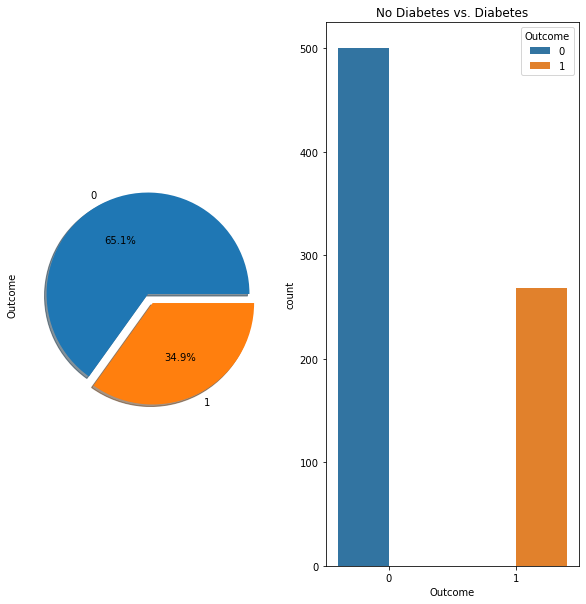

In [276]:
#Below we see that data is unbalanced with more "0" (65.1%) for not diabetic vs. "1" (34.9%) for diabetic
f,ax=plt.subplots(1,2,figsize=(10,10))
diabetes_data['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
sns.countplot(x="Outcome", hue="Outcome", data=diabetes_data)
ax[1].set_title('No Diabetes vs. Diabetes')
plt.show()


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

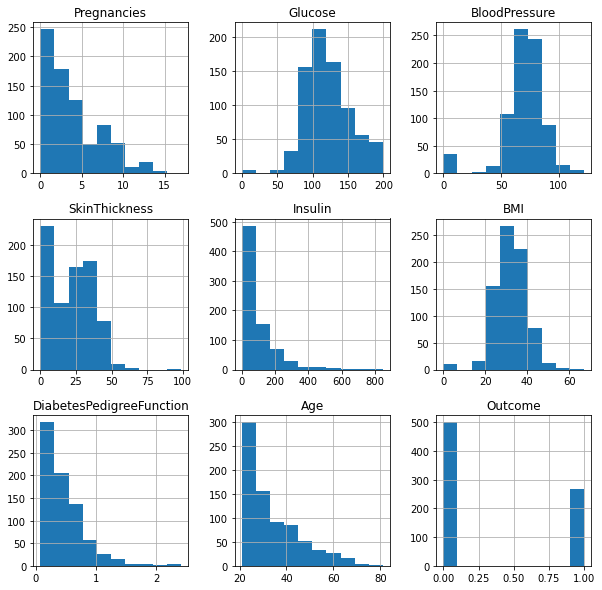

In [277]:
diabetes_data.hist(figsize=(10,10))

## Exploration Conclusion:
### Class Distribution:
- 0 : 500 
- 1 : 268

### Data characteristics:

- The database contains only data about female patients who are of Pima Indian heritage are 21 or older
- All the attributes are numeric
- The data may contain invalid or null values
- Total number of cases in dataset: 786

### DATA CLEANING

#### The value  "0"  indicates missing value for some of the features

#### Based on the results above, the following columns have zero values that should not be 0:

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

####  "Pregnancy" has "0" but it is ok to have 0 pregnancy so we do not need to change those zeros

#### Lets clean the data so that it works better with Machine Learning


In [321]:
#'Glucose','BloodPressure','SkinThickness','Insulin','BMI' should not have "0" values
#make a copy of dataframe
diabetes_data_copy = diabetes_data.copy()

# mark "0" values as NaN
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## show the count of Nans for each feature
diabetes_data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [322]:
#Now that we replace the "0" with Nan the mean and min look different 
diabetes_data_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### FILL MISSING VALUES
method 1: with pandas

In [323]:

#fill the nan values with mean 

#"Glucose" ,"BloodPressure" , "BMI" have normal distribution so we can replace missing values with mean
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)


#"SkinThickness" and "Insulin" have a distribution skewed to left so we replace missing value with median
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].mean(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].mean, inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].mean(), inplace = True)


In [324]:
# show the count of Nans after cleaning data
#looks like we got rid of all Nans
diabetes_data_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### FILL MISSING VALUES
method 2 with scikit-learn

In [326]:
diabetes_data_missing = diabetes_data.copy()
diabetes_data_missing[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_missing[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## show the count of Nans , "isnull" and "isna" show same result
diabetes_data_missing.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [327]:

# Create feature matrix X
X= diabetes_data_missing.drop("Outcome", axis=1)

# Create Y - the result of X
y= diabetes_data_missing["Outcome"]


In [328]:
#see "X" values
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47


In [339]:
#see "y" values
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [330]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#The sklean imputer is used to fill missing values

#define the imputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')


In [331]:
#Now We can Transform the X Data
filled_X= imputer.fit_transform(X)
filled_X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [332]:
diabetes_data_filled = pd.DataFrame(filled_X,
                                    columns=['Pregnancies','Glucose','BloodPressure','SkinThickness',
                                             'Insulin','BMI','DiabetesPedigreeFunction','Age'])

diabetes_data_filled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0
765,5.0,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0
766,1.0,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0


In [333]:
#As we see below, we now have no more missing values after we transfored the values
diabetes_data_filled.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [338]:

diabetes_clean_data = pd.concat([diabetes_data_filled.copy(),y], axis=1)
diabetes_clean_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0,0
766,1.0,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0,1


In [342]:
# now we can check correlation matrix on cleaner data
corr_matrix = diabetes_clean_data.corr()
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492928
BMI                         0.311924
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.215299
Insulin                     0.214411
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64

<AxesSubplot:>

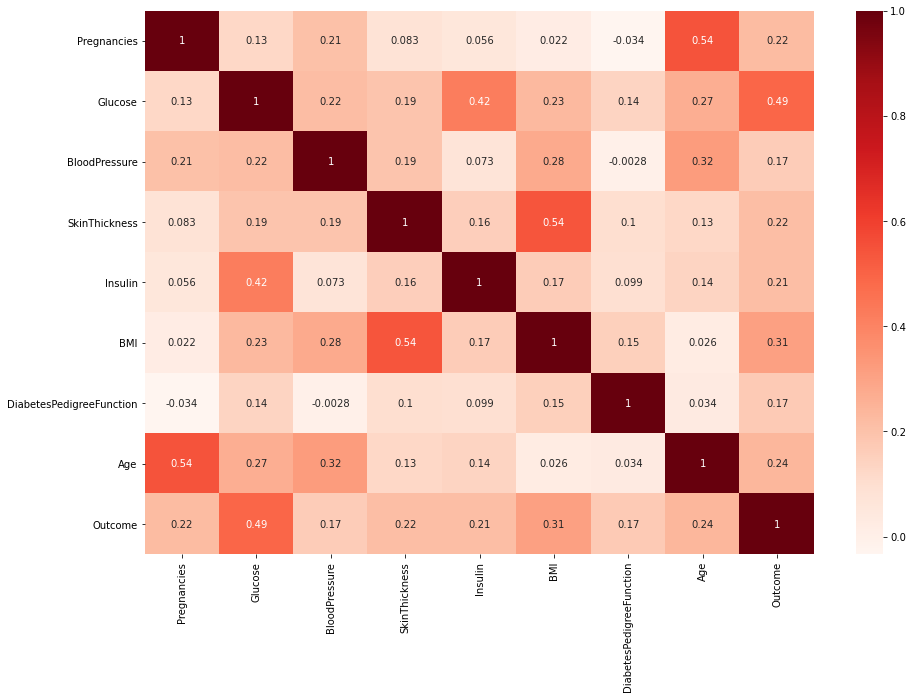

In [341]:
#heatmat of data
#Based on data above and heatmap, tt looks like Glucose is most important feature
plt.figure(figsize=(15,10)) 
sns.heatmap(diabetes_clean_data.corr(), annot=True, cmap=plt.cm.Reds)

## Understanding the Features more

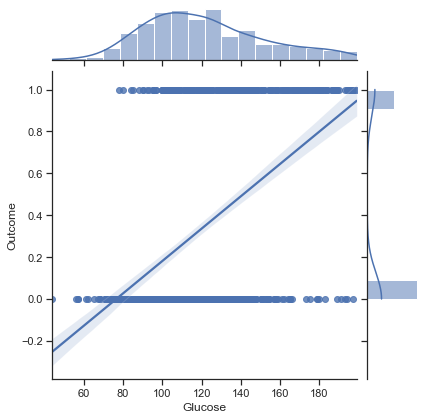

In [397]:
#Glucose
sns.jointplot(x="Glucose", y="Outcome", data= diabetes_data_clean, kind="reg")


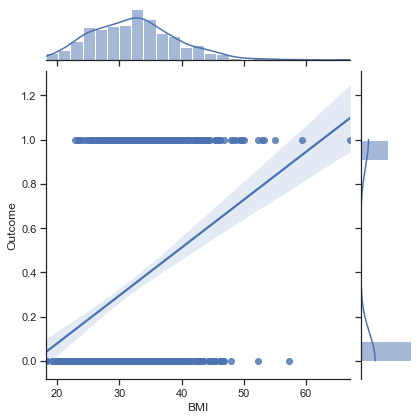

In [398]:
#BMI
sns.jointplot(x="BMI", y="Outcome", data= diabetes_data_clean, kind="reg")


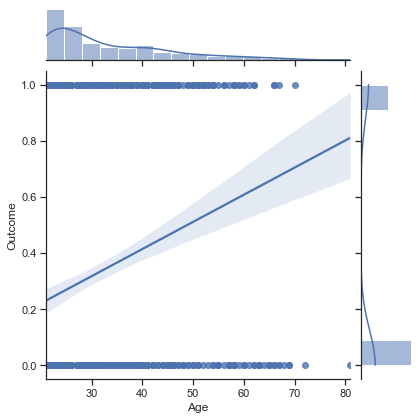

In [399]:
#Age
sns.jointplot(x="Age", y="Outcome", data= diabetes_data_clean, kind="reg")

<Figure size 1440x1440 with 0 Axes>

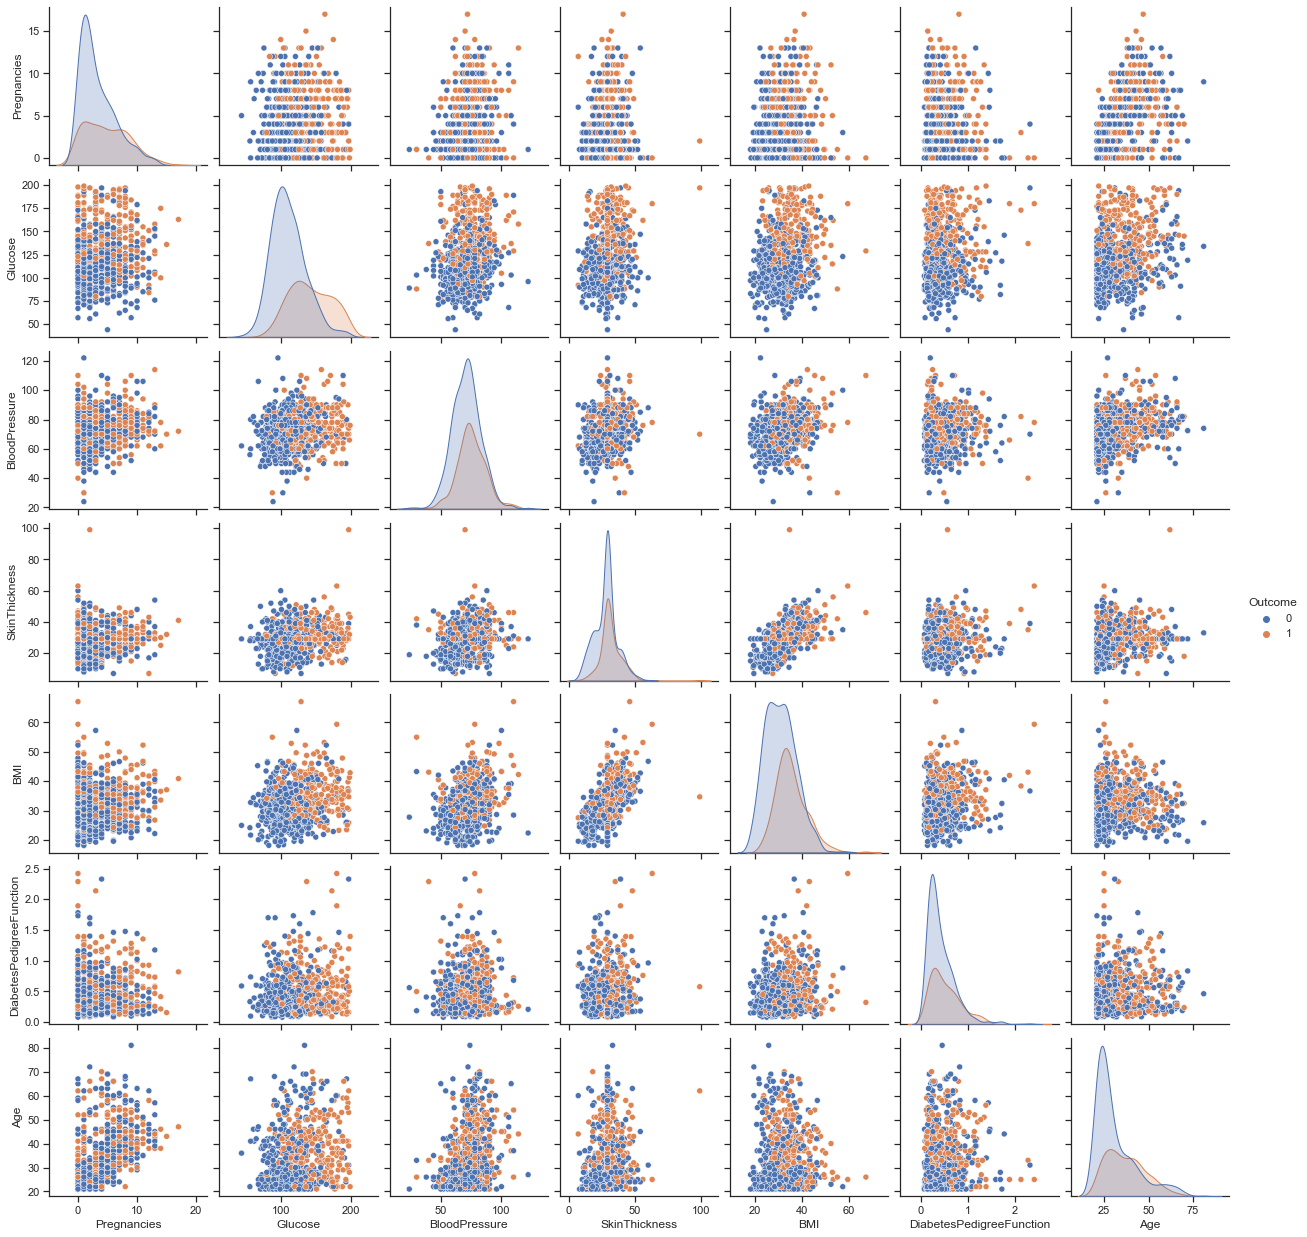

In [401]:

plt.figure(figsize=(20,20))
sns.pairplot(diabetes_data_clean, hue='Outcome')

<AxesSubplot:>

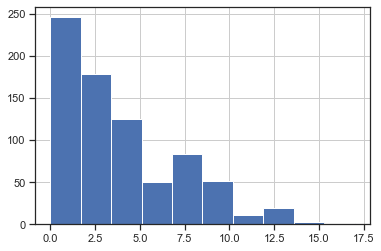

In [373]:

#Pregnancy
#In the It looks like we have outliers in "Pregnancies"
#prenancy has outliers. Does not sound right that there is data with 17 pregnancies
diabetes_clean_data["Pregnancies"].hist()

In [500]:
# Filter all rows for which the Pregnancy is higher than 10
diabetes_clean_data.drop(diabetes_clean_data[diabetes_clean_data['Pregnancies'] >10].index, inplace = True) 

In [502]:
#now we can check data shape
#it looks like there were 34 records that we got rid of
diabetes_clean_data.shape

(734, 9)

In [ ]:
#will need to work on cleaning data more in future versions. 

In [485]:
#For now will just work on creating Machine Learning Model and will update this section later

## Choosing Algorithm and Creating Model
### Split the data into features and labels:  'X' and 'y'

In [704]:


# Create feature matrix X
X= diabetes_clean_data.drop("Outcome", axis=1)

# Create Y - the result of X
y= diabetes_clean_data["Outcome"]

### Choosing algorithm

In [705]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Logistic Regression

In [706]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=300)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [707]:
from sklearn.metrics import f1_score, precision_score, recall_score

f1_score(y_test, y_pred, average='macro')

0.7753628172501548

In [708]:
precision_score(y_test, y_pred,  average='macro')

0.7917756466143563

In [709]:
recall_score(y_test, y_pred, average='macro')

0.7631027253668763

### Random Forest Classifier

In [710]:

from sklearn.ensemble import RandomForestClassifier

In [711]:
#we initialize the classifer
clf = RandomForestClassifier()

In [712]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(rf.score(X_test, y_test)))



Accuracy of Random Forest on test set: 0.81


In [713]:
f1_score(y_test, y_pred, average="macro")

0.741557128412538

In [714]:
precision_score(y_test, y_pred, average="macro")

0.7493744787322769

In [715]:
recall_score(y_test, y_pred, average="macro")

0.7350628930817611

### Fitting the model/algorithm for our problem and using it to make predictions

In [532]:
#Using the Random Forrest Classifier

In [716]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [717]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
567,6.0,92.0,62.0,32.00000,126.000000,32.0,0.085,46.0
440,0.0,189.0,104.0,25.00000,155.548223,34.3,0.435,41.0
627,0.0,132.0,78.0,29.15342,155.548223,32.4,0.393,21.0
544,1.0,88.0,78.0,29.00000,76.000000,32.0,0.365,29.0
602,1.0,124.0,74.0,36.00000,155.548223,27.8,0.100,30.0


In [718]:
# make a prediction

y_predict = clf.predict(X_test)
y_predict

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0])

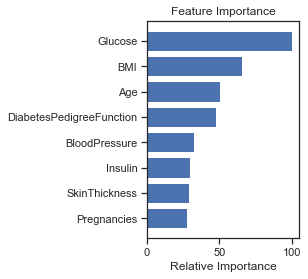

In [719]:
# Plot of feature importance 
#After working on the data above 
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, diabetes_clean_data.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

### Evaluating the model on the training data and test data

In [720]:

# -- to check how well the classifier did on training data
# this returns the mean of the accuracy of the model on the training data.. 1.0 means it is 100% accurate
clf.score(X_train, y_train)

1.0

In [721]:
#lets check how it is doing on the test data
# on test data it performs with less accuracy because it has not seen the data. .69 is still good!
clf.score(X_test, y_test)

0.8098591549295775

In [722]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [723]:

# this compares test labels vs predict labels
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       106
           1       0.66      0.53      0.58        36

    accuracy                           0.81       142
   macro avg       0.75      0.72      0.73       142
weighted avg       0.80      0.81      0.80       142



In [724]:

cm=confusion_matrix(y_test, y_predict, normalize = 'true')
cm

array([[0.90566038, 0.09433962],
       [0.47222222, 0.52777778]])

<AxesSubplot:>

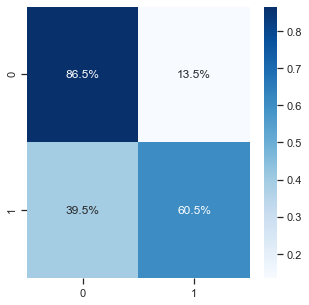

In [601]:
plt.figure(figsize=(5,5)) 
sns.heatmap(cm, annot=True,cmap='Blues', fmt='.1%')

In [602]:
accuracy_score(y_test, y_predict)

0.7891156462585034

### Saving and loading the trained models

In [603]:
import pickle

#Save Random Forest Model
clf= RandomForestClassifier(n_estimators=30).fit(X_train, y_train)
#the model below will be the last one from above for loop with 60 estimators
pickle.dump(clf, open("diabetes_random_forrest_model.pkl", "wb"))


In [604]:
loaded_model= pickle.load(open("diabetes_random_forrest_model.pkl", "rb"))

In [605]:
#the result from pickle file is the same as above
loaded_model.score(X_test, y_test)

0.7891156462585034

### Putting it all together

In [ ]:
## the pickle model was used to create a streamlit app . See mlapp.py and healthtools